In [1]:
from pretty_tools.visualization import bbox_convert_np
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
bboxes = np.array([[827.82458496, 738.5569458, 937.07751465, 983.7911377], [1171.41674805, 51.3410759, 1214.76159668, 160.52073288],
                               [1147.53527832, 693.87664795, 1269.04736328, 960.7043457], [320.17575073, 650.61608887, 434.10876465, 912.78771973],
                               [1818.14257812, 270.06488037, 1915.07556152, 462.42419434], [508.56640625, 163.56619263, 564.137146, 303.78341675],
                               [10.59531975, 216.00405884, 129.67011833, 379.37728882], [278.41213989, 198.63432312, 340.89767456, 345.30392456],
                               [1021.55444336, 368.80096436, 1098.07055664, 577.02966309]])


len(edgelist)=27


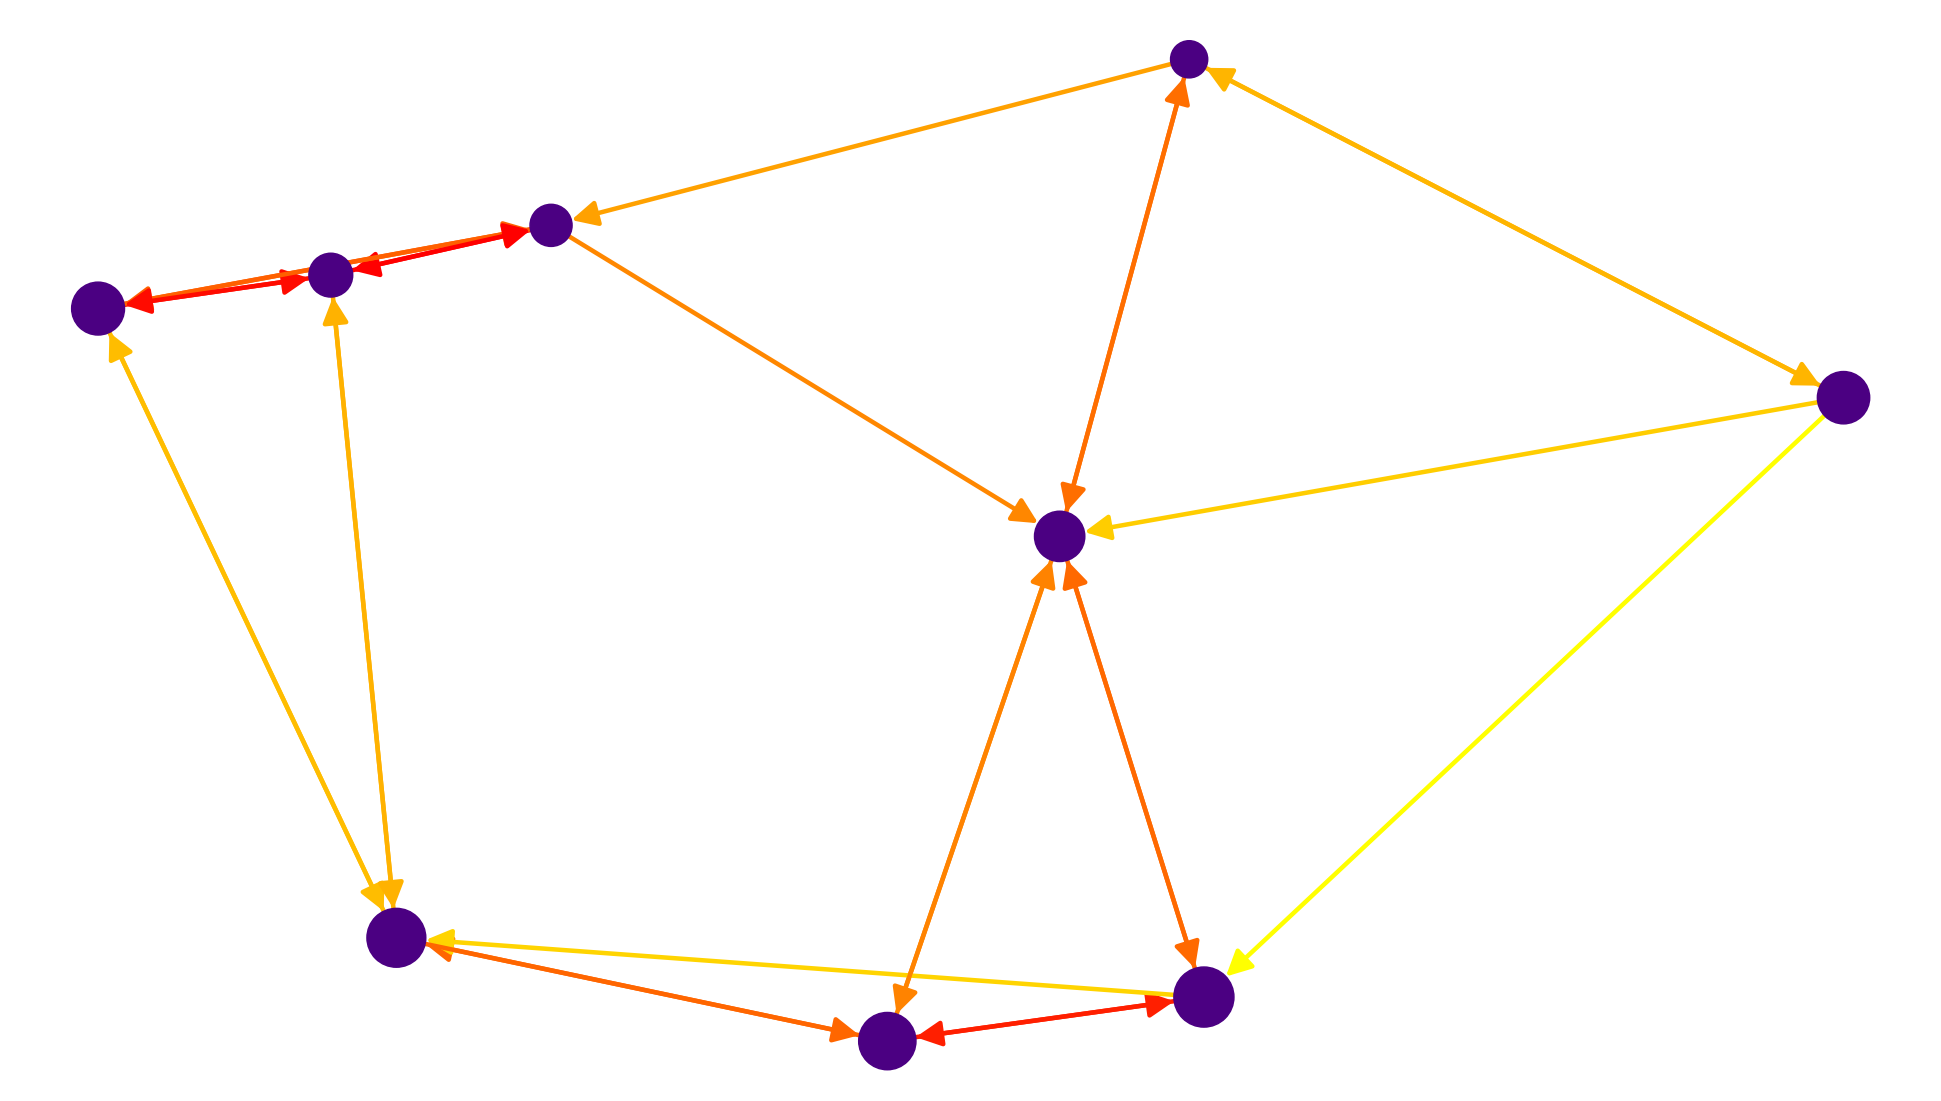

In [3]:
from pretty_tools.visualization import Visual_Graph

from ContionTrack.utils.graph_edge import edge_by_knn

edgelist, dist = edge_by_knn(bboxes, k=3)  #* 默认使用的是锚框的底边中点作为距离度量参考点
edgelist = edgelist.T
xywh = bbox_convert_np.ltrb_to_xywh(bboxes)
pos = xywh[:, :2] / [1920, 1080]  #* 使用xy作为坐标， 并进行归一化
node_sizes = np.sqrt(xywh[:, 2] * xywh[:, 3])  #* 面积开个根作为节点大小

visual_graph = Visual_Graph()
visual_graph.set_node(np.arange(len(bboxes)))
visual_graph.set_edge(edgelist)
visual_graph.set_dist(dist) #todo 目前是必须设置的
visual_graph.set_pos(pos) #todo 目前是必须设置的
visual_graph.set_node_size(node_sizes)  #todo 目前是必须设置的

img_graph = visual_graph.draw_graph(new=True)
print(f"len(edgelist)={len(edgelist)}")

len(edgelist)=27
请人工判断画图模块是否成功，上下两张图像的应该是差不太多的


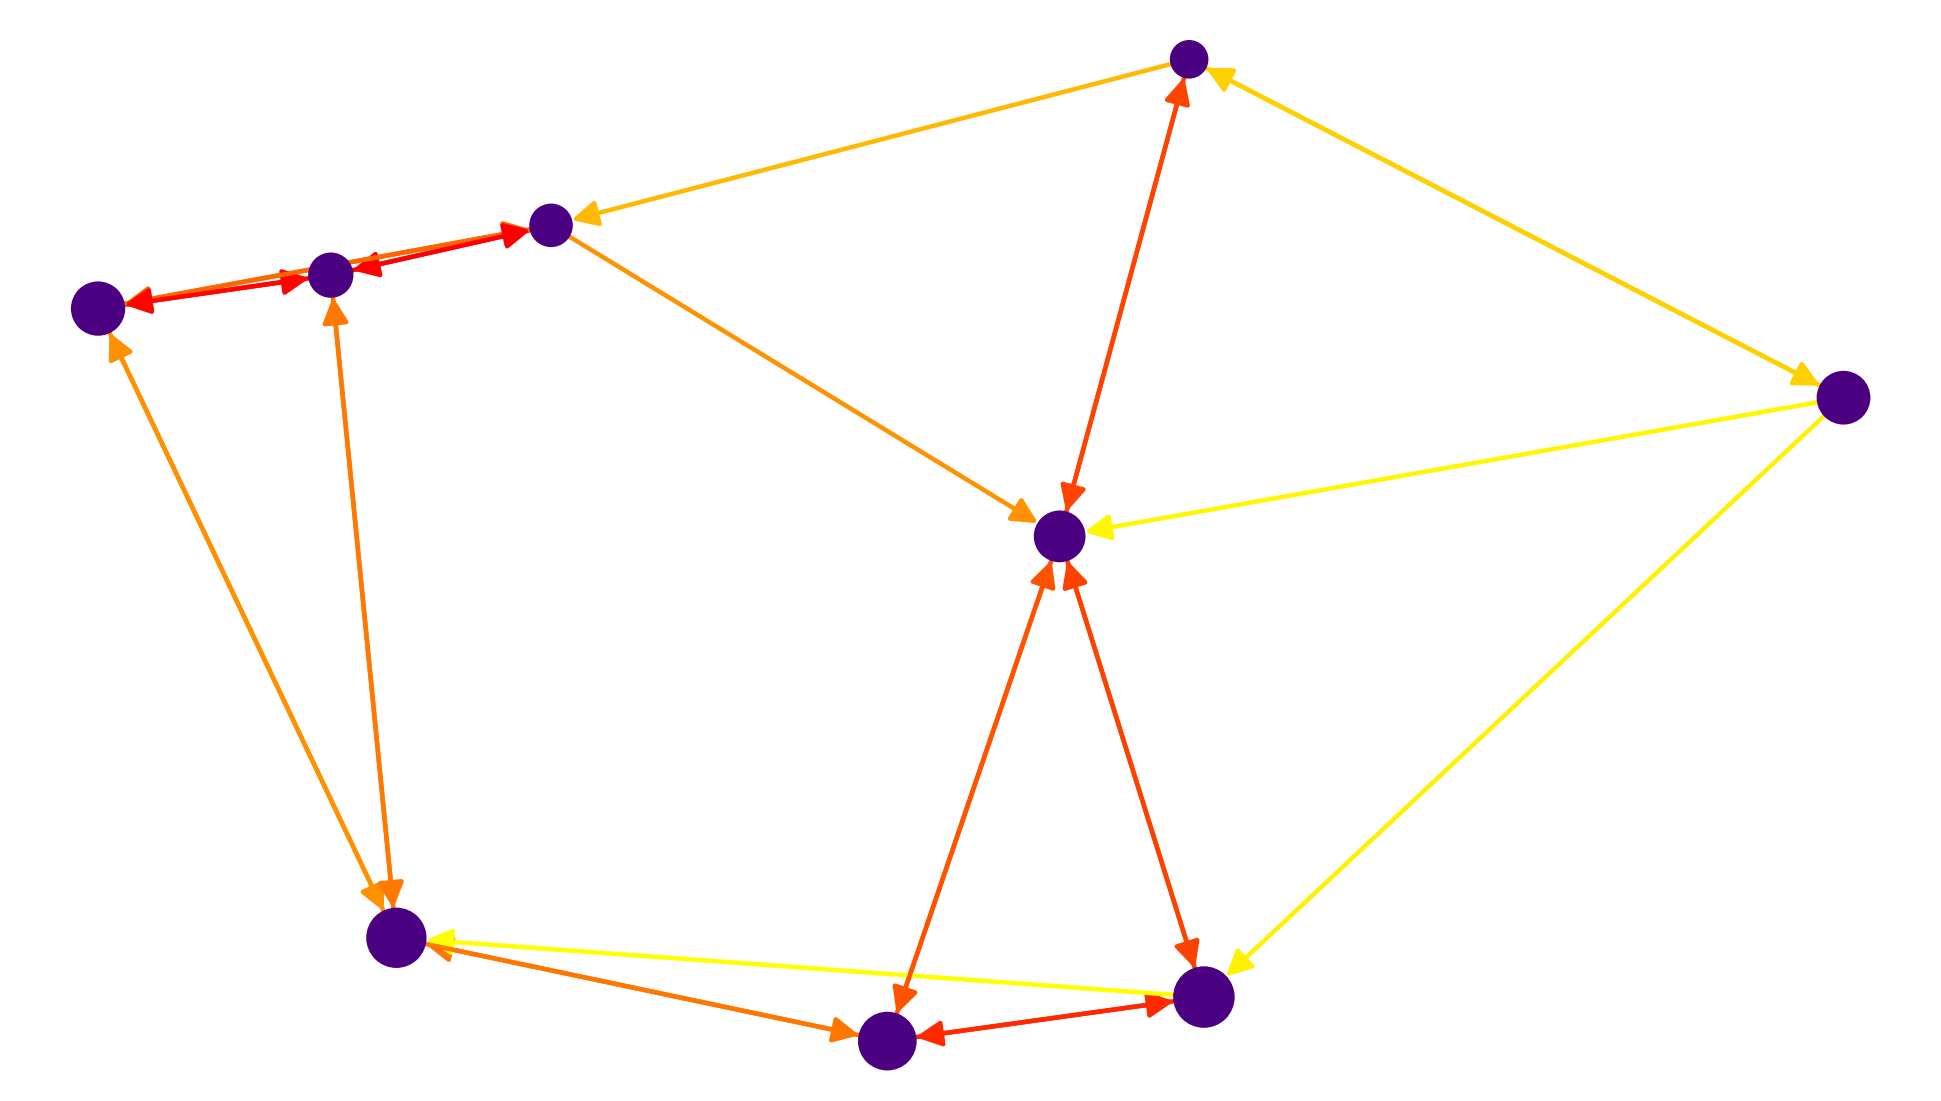

In [4]:
from pretty_tools.datastruct.track_graph import TrackCameraGraph
from pretty_tools import PATH_PRETTY
#! edgelist 沿用上一个代码块的
test_feat = np.load(PATH_PRETTY.joinpath('resources/data/test_feat_9x2048.npy'))
print(f"len(edgelist)={len(edgelist)}")
test_trackgraph = TrackCameraGraph(
    ori_ann=bboxes,
    str_format="ltrb",
    node_x=test_feat,
    edge_index=edgelist,
    ori_WH=(1920, 1080),
)

img = test_trackgraph.visualize()

print("请人工判断画图模块是否成功，上下两张图像的应该是差不太多的")

(1920, 1080)


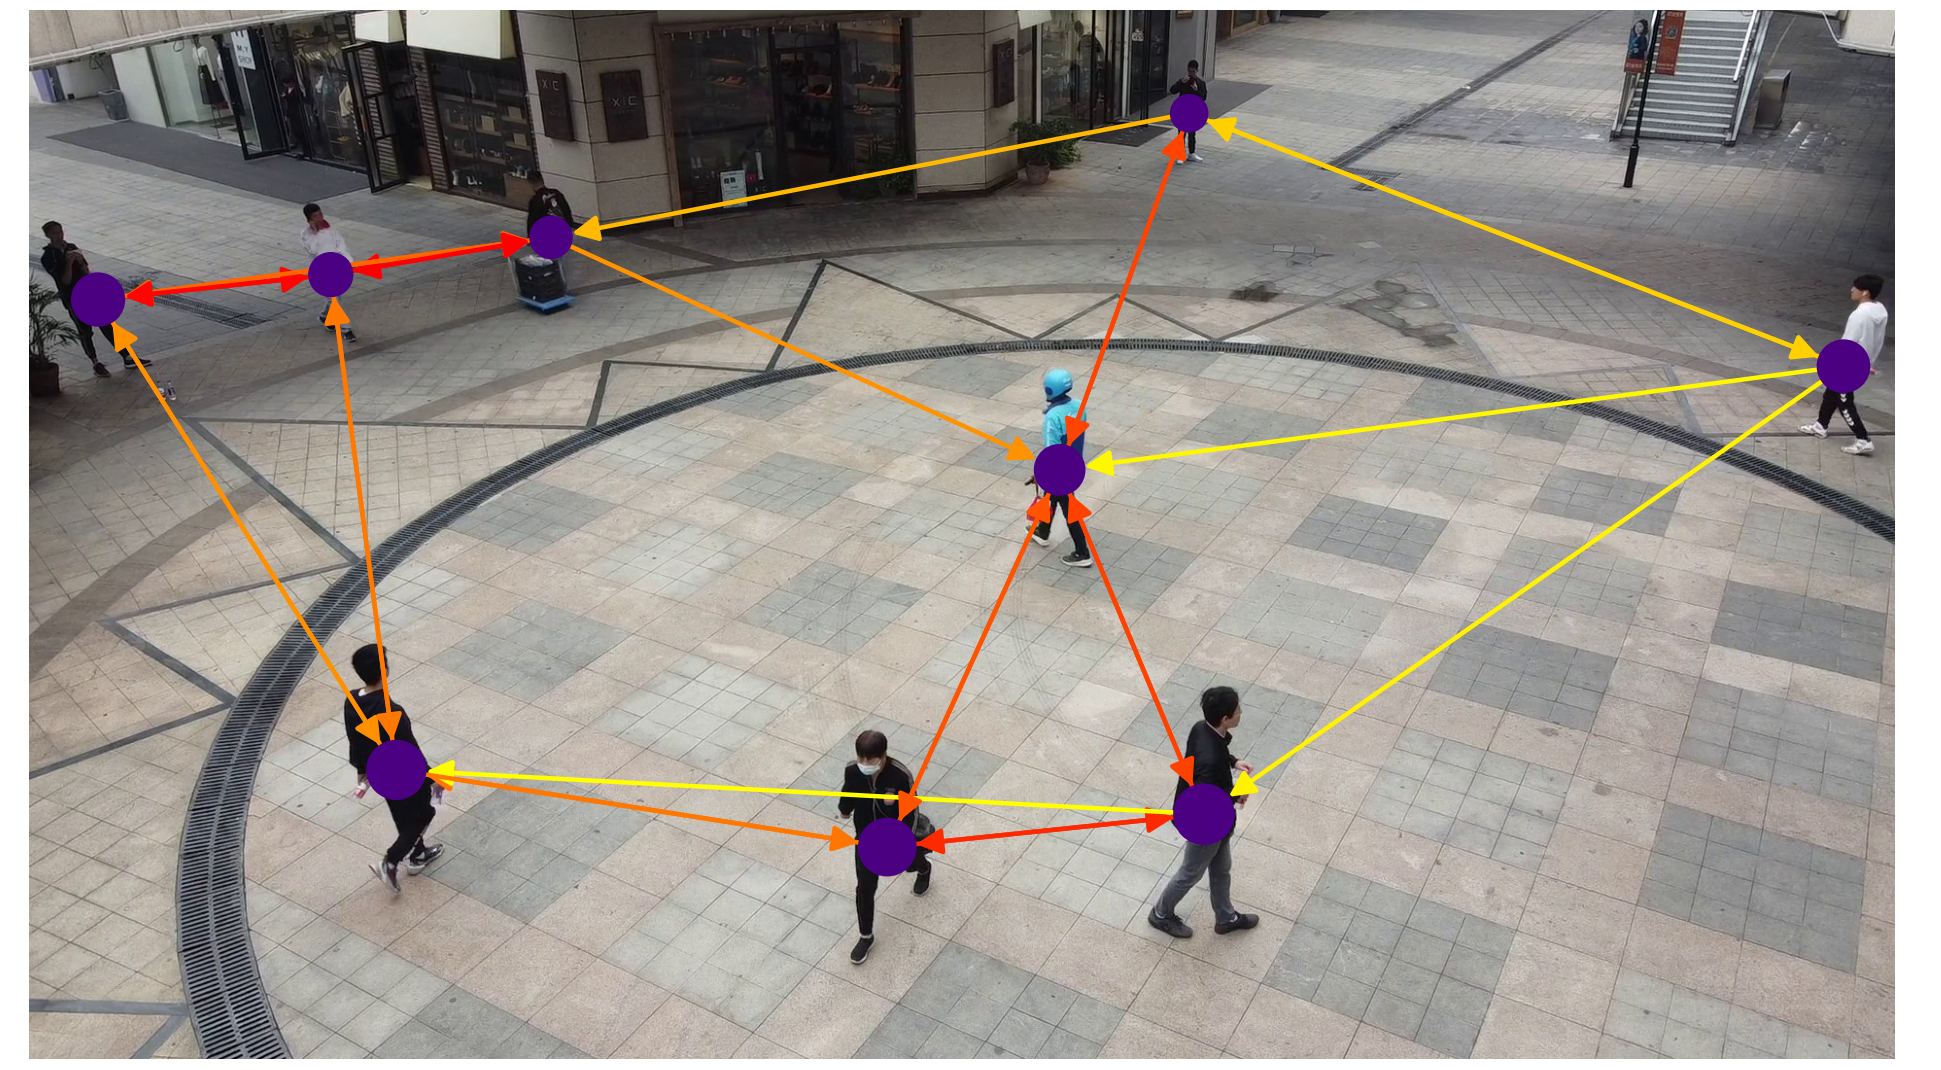

In [5]:
from pretty_tools.datastruct import TrackCameraInstances
from PIL import Image
target = TrackCameraInstances(ori_ann=bboxes, str_format="ltrb", ori_WH=(1920, 1080))
image_camera = Image.open(PATH_PRETTY.joinpath("resources/imgs/Circle_View1_000001.jpg"))
test_trackgraph = TrackCameraGraph(
    from_general=target,
    node_x=test_feat,
    edge_index=edgelist
)
img = test_trackgraph.visualize(img_camera=image_camera)
print(img.size)

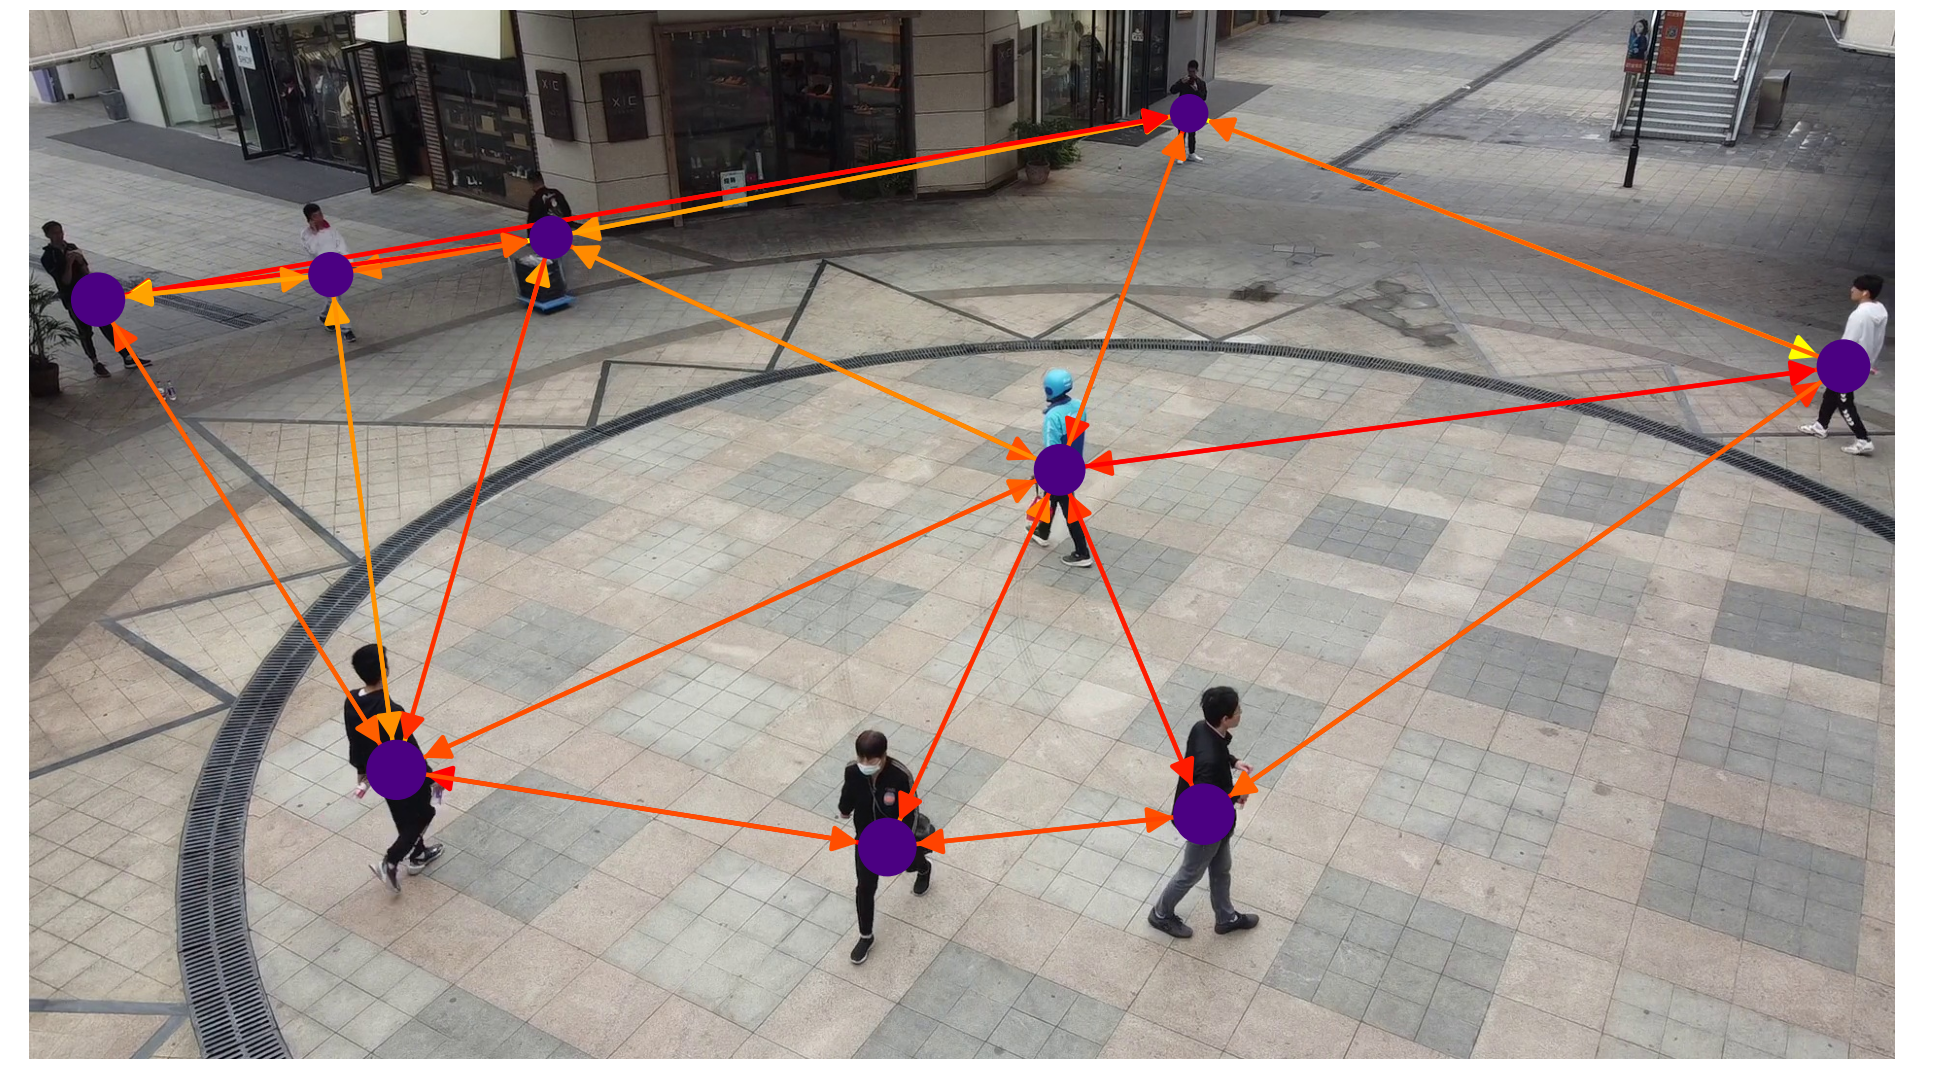

In [7]:
# 绘制三角化的图结构
from ContionTrack.utils.graph_edge import edge_by_triangulation
edge_triangulation, dist = edge_by_triangulation(bboxes)

test_trackgraph = TrackCameraGraph(ori_ann=bboxes, str_format="ltrb", edge_index=edge_triangulation, ori_WH=(1920, 1080))
img = test_trackgraph.visualize(img_camera=image_camera)
